In [1]:
!pip install konlpy
!pip install wordcloud

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

#import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from bokeh.plotting import figure
import random
from konlpy.tag import Komoran
tagger = Komoran()
from collections import Counter
from wordcloud import WordCloud
import networkx as nx
import re
import math

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 d

In [2]:
from importlib import reload
plt=reload(plt)

plt.rcParams["font.family"] = 'NanumGothic'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
with open('/content/drive/MyDrive/data_journalism/movie_df.xlsx',mode="rb") as excel_file:
    DF = pd.read_excel(excel_file)

In [5]:
DF

title  year  audience                 date        genre  \
0                  범죄도시 2  2022  12693023  2022-05-18 00:00:00       범죄, 액션   
1                 탑건: 매버릭  2022   8171923  2022-06-22 00:00:00           액션   
2               한산: 용의 출현  2022   7262885  2022-07-27 00:00:00      액션, 드라마   
3              공조2: 인터내셔날  2022   6948819  2022-09-07 00:00:00      액션, 코미디   
4     닥터 스트레인지: 대혼돈의 멀티버스  2022   5884600  2022-05-04 00:00:00  액션, 판타지, 모험   
...                   ...   ...       ...                  ...          ...   
4291               무림 악인전  1980     20342  1980-04-10 00:00:00           액션   
4292                   복권  1980     20307  1980-06-21 00:00:00          NaN   
4293             바다로 간 목마  1980     20041  1980-10-18 00:00:00          NaN   
4294           최인호의 병태 만세  1980     18332  1980-12-12 00:00:00          NaN   
4295                해뜨는 집  1980     17987  1980-12-06 00:00:00          NaN   

                                                  actor country  \
0           마동석(마석도), 손석구(강해상), 최귀화(전일만), 마동석, 손석구, 최귀화    대한민국   
1     톰 크루즈(매버릭), 마일즈 텔러(루스터), 제니퍼 코넬리(페니), 톰 크루즈, 마...      미국   
2     박해일(이순신), 변요한(와키자카 야스하루), 안성기(어영담), 박해일, 변요한, 안성기    대한민국   
3               현빈(림철령), 유해진(강진태), 윤아(박민영), 현빈, 유해진, 윤아    대한민국   
4     베네딕트 컴버배치(닥터 스트레인지), 엘리자베스 올슨(완다 막시모프 / 스칼렛 위치...      미국   
...                                                 ...     ...   
4291                       정진화, 서영란, 장일식, 정진화, 서영란, 장일식    대한민국   
4292                       정진화, 김명아, 김기주, 정진화, 김명아, 김기주    대한민국   
4293                                 장미희, 윤일봉, 장미희, 윤일봉    대한민국   
4294                       엄인태, 이미영, 정한용, 엄인태, 이미영, 정한용    대한민국   
4295                       강주희, 이승현, 김정훈, 강주희, 이승현, 김정훈    대한민국   

              director      age  score  \
0             이상용, 이상용  15세 관람가   9.32   
1     조셉 코신스키, 조셉 코신스키  12세 관람가   9.76   
2             김한민, 김한민  12세 관람가   8.75   
3             이석훈, 이석훈  15세 관람가   8.44   
4         샘 레이미, 샘 레이미  12세 관람가   7.22   
...                ...      ...    ...   
4291      김정용, 김정용, 신고      NaN   7.00   
4292          김정용, 김정용  12세 관람가   0.00   
4293      정진우, 정진우, 신고  12세 관람가   6.29   
4294          김수형, 김수형  12세 관람가   0.00   
4295      석래명, 석래명, 신고   전체 관람가   9.44   

                                               synopsis  
0     ['가리봉동 소탕작전 후 4년 뒤,금천서 강력반은 베트남으로 도주한 용의자를 인도받...  
1     ['최고의 파일럿이자 전설적인 인물 매버릭(톰 크루즈)은 자신이 졸업한 훈련학교 교...  
2     ['1592년 4월, 조선은 임진왜란 발발 후 단 15일 만에 왜군에 한양을 빼앗기...  
3     ['공조 이즈 백! 이번엔 삼각 공조다!남한으로 숨어든 글로벌 범죄 조직을 잡기 위...  
4     ['끝없이 균열되는 차원과 뒤엉킨 시공간의 멀티버스가 열리며오랜 동료들, 그리고 차...  
...                                                 ...  
4291  ['고구려가 요동땅을 다스릴때 막대한 황금엽전을 그곳에 매장한다. 고려왕조가 기울어...  
4292  ['이대복은 신체조건이 맞지않아 공초대사로부터 다른길을 가라는 가르침을 받고 하산한...  
4293  ['여대생 주희(장미희 분)는 11년 연상의 농아학교 교사 이민우(윤일봉 분)를 사...  
4294  ['신학기가 시작되자 철학과 강의실에 편입생 순철이 들어오므로 병태와 친숙해진다. ...  
4295  ['영아는 말괄량이로 엄마와 둘이 살아간다. 영아는 친구들과 어울려 미팅장소엘 갔다...  

[4296 rows x 11 columns]

In [6]:
DF.columns = ['title','year','audience','date','genre','actor','country','director','age','score','synopsis']
DF["title"]=DF["title"].apply(str)
DF["genre"]=DF["genre"].apply(str)
DF["actor"]=DF["actor"].apply(str)
DF["director"]=DF["director"].apply(str)
DF["age"] = DF["age"].apply(str)

In [7]:
DF['genre']=DF['genre'].replace(["멜로"],'로맨스')

In [ ]:
DF[DF['year']==2022]

title  year  audience                 date         genre  \
0                범죄도시 2  2022  12693023  2022-05-18 00:00:00        범죄, 액션   
1               탑건: 매버릭  2022   8171923  2022-06-22 00:00:00            액션   
2             한산: 용의 출현  2022   7262885  2022-07-27 00:00:00       액션, 드라마   
3            공조2: 인터내셔날  2022   6948819  2022-09-07 00:00:00       액션, 코미디   
4   닥터 스트레인지: 대혼돈의 멀티버스  2022   5884600  2022-05-04 00:00:00   액션, 판타지, 모험   
..                  ...   ...       ...                  ...           ...   
95              어나더 라운드  2022     36126  2022-01-19 00:00:00           드라마   
96            배니싱: 미제사건  2022     35164  2022-03-30 00:00:00       범죄, 스릴러   
97                뒤틀린 집  2022     34886  2022-07-13 00:00:00  공포, 드라마, 스릴러   
98                   봄날  2022     34100  2022-04-27 00:00:00  드라마, 액션, 느와르   
99          아치의 노래, 정태춘  2022     33399  2022-05-18 00:00:00         다큐멘터리   

                                                actor country  \
0         마동석(마석도), 손석구(강해상), 최귀화(전일만), 마동석, 손석구, 최귀화    대한민국   
1   톰 크루즈(매버릭), 마일즈 텔러(루스터), 제니퍼 코넬리(페니), 톰 크루즈, 마...      미국   
2   박해일(이순신), 변요한(와키자카 야스하루), 안성기(어영담), 박해일, 변요한, 안성기    대한민국   
3             현빈(림철령), 유해진(강진태), 윤아(박민영), 현빈, 유해진, 윤아    대한민국   
4   베네딕트 컴버배치(닥터 스트레인지), 엘리자베스 올슨(완다 막시모프 / 스칼렛 위치...      미국   
..                                                ...     ...   
95  매즈 미켈슨, 토머스 보 라센, 라르스 란데, 매즈 미켈슨, 토머스 보 라센, 라르...     덴마크   
96  유연석(박진호), 올가 쿠릴렌코(알리스 로네), 예지원(이미숙), 유연석, 올가 쿠...     프랑스   
97           서영희(명해), 김보민(희우), 김민재(현민), 서영희, 김보민, 김민재    대한민국   
98                                       손현주(호성), 손현주    대한민국   
99                         정태춘(본인), 박은옥(본인), 정태춘, 박은옥    대한민국   

                    director      age  score  \
0                   이상용, 이상용  15세 관람가   9.32   
1           조셉 코신스키, 조셉 코신스키  12세 관람가   9.76   
2                   김한민, 김한민  12세 관람가   8.75   
3                   이석훈, 이석훈  15세 관람가   8.44   
4               샘 레이미, 샘 레이미  12세 관람가   7.22   
..                       ...      ...    ...   
95  토마스 빈터베르그, 토마스 빈터베르그, 신고  15세 관람가   8.38   
96          드니 데르쿠르, 드니 데르쿠르  15세 관람가   4.05   
97                  강동헌, 강동헌  15세 관람가   4.17   
98                  이돈구, 이돈구  15세 관람가   7.56   
99                  고영재, 고영재   전체 관람가   9.35   

                                             synopsis  
0   ['가리봉동 소탕작전 후 4년 뒤,금천서 강력반은 베트남으로 도주한 용의자를 인도받...  
1   ['최고의 파일럿이자 전설적인 인물 매버릭(톰 크루즈)은 자신이 졸업한 훈련학교 교...  
2   ['1592년 4월, 조선은 임진왜란 발발 후 단 15일 만에 왜군에 한양을 빼앗기...  
3   ['공조 이즈 백! 이번엔 삼각 공조다!남한으로 숨어든 글로벌 범죄 조직을 잡기 위...  
4   ['끝없이 균열되는 차원과 뒤엉킨 시공간의 멀티버스가 열리며오랜 동료들, 그리고 차...  
..                                                ...  
95  ['각각 역사, 체육, 음악, 심리학을 가르치는 같은 고등학교 교사 니콜라이, 마르...  
96  ['어느 날 심하게 훼손되어 신원을 알 수 없는 변사체가 발견되고사건을 맡은 형사 ...  
97  ['피치 못할 사정으로 외딴집에 이사 오게 된 가족.엄마 ‘명혜’는 이사 온 첫 날...  
98  ["한때는 잘나가던 큰형님 '호성'(손현주).8년 만에 출소해 보니 남보다 못한 동...  
99  ['10대 가수상, 가요 사전심의 철폐운동그리고 음악시장을 홀연히 떠나기까지어디서도...  

[96 rows x 11 columns]

In [ ]:
DF['genre']

0            범죄, 액션
1                액션
2           액션, 드라마
3           액션, 코미디
4       액션, 판타지, 모험
           ...     
4291             액션
4292            nan
4293            nan
4294            nan
4295            nan
Name: genre, Length: 4296, dtype: object

In [ ]:
# 장르 태깅(명사, 고유명사)
# 멜로와 로맨스는 항상 같이 나와서 로맨스로 통일하고 멜로를 없앰
genre_list = {}
genre_list_all = []
for i in range(0,43):
    genre_list[i] = []
    sentences = DF[DF.year==2022-i]['genre'].values.tolist()
    tagged_sentences = [tagger.pos(sent) for sent in sentences]
    for sent in tagged_sentences:  
        for word, tag in sent:
            if tag in ['NNG','NNP'] and len(word)>1 and word not in ["멜로"]:
                genre_list[i].append(word)
                genre_list_all.append(word)

In [ ]:
top_genre = []
for i in range(len(Counter(genre_list_all))):
    top_genre.append(Counter(genre_list_all).most_common()[i][0])

In [ ]:
top_genre

['드라마',
 '액션',
 '코미디',
 '스릴러',
 '로맨스',
 '모험',
 '범죄',
 '판타지',
 '애니메이션',
 '가족',
 '공포',
 '미스터리',
 '전쟁',
 '뮤지컬',
 '다큐멘터리',
 '느와르',
 '서부',
 '에로',
 '서스펜스',
 '서사',
 '실험',
 '무협']

# 코미디영화

In [8]:
#코미디 영화 

DF_comedy=DF[DF.genre.str.contains('코미디')]
DF_comedy

title  year  audience                 date           genre  \
3      공조2: 인터내셔날  2022   6948819  2022-09-07 00:00:00         액션, 코미디   
9           미니언즈2  2022   2268518  2022-07-20 00:00:00  애니메이션, 모험, 코미디   
12      육사오(6/45)  2022   1977535  2022-08-24 00:00:00             코미디   
15     해적: 도깨비 깃발  2022   1339242  2022-01-26 00:00:00     모험, 액션, 코미디   
20        정직한 후보2  2022    892181  2022-09-28 00:00:00             코미디   
...           ...   ...       ...                  ...             ...   
4242  뭔가 보여드리겠읍니다  1980     70993  1980-06-06 00:00:00             코미디   
4244       순악질 여사  1980     68925  1980-03-29 00:00:00             코미디   
4248           애권  1980     61286  1980-04-24 00:00:00         액션, 코미디   
4262     속 병태와 영자  1980     36645  1980-11-19 00:00:00     코미디, 멜로/로맨스   
4288      춘자는 못말려  1980     20883  1980-05-16 00:00:00        드라마, 코미디   

                                                  actor country      director  \
3               현빈(림철령), 유해진(강진태), 윤아(박민영), 현빈, 유해진, 윤아    대한민국      이석훈, 이석훈   
9     스티브 카렐(그루 목소리), 타라지 P. 헨슨(벨 바텀 목소리), 양자경, 스티브 ...      미국  카일 발다, 카일 발다   
12          고경표(박천우), 이이경(리용호), 음문석(강은표), 고경표, 이이경, 음문석    대한민국      박규태, 박규태   
15             강하늘(무치), 한효주(해랑), 이광수(막이), 강하늘, 한효주, 이광수    대한민국      김정훈, 김정훈   
20          라미란(주상숙), 김무열(박희철), 윤경호(봉만식), 라미란, 김무열, 윤경호    대한민국      장유정, 장유정   
...                                                 ...     ...           ...   
4242                       이주일, 김윤미, 이승현, 이주일, 김윤미, 이승현    대한민국  김수형, 김수형, 신고   
4244                                 장미희, 이영하, 장미희, 이영하    대한민국  김수형, 김수형, 신고   
4248                       강용석, 배수천, 윤상미, 강용석, 배수천, 윤상미    대한민국  이형표, 이형표, 신고   
4262                                 하재영, 이영옥, 하재영, 이영옥    대한민국  이강윤, 이강윤, 신고   
4288                         김진, 박원숙, 송승환, 김진, 박원숙, 송승환    대한민국  김선경, 김선경, 신고   

           age  score                                           synopsis  
3      15세 관람가   8.44  ['공조 이즈 백! 이번엔 삼각 공조다!남한으로 숨어든 글로벌 범죄 조직을 잡기 위...  
9       전체 관람가   7.68  ['세계 최고의 슈퍼 악당을 꿈꾸는 미니보스 ‘그루’와 그를 따라다니는 미니언들.어...  
12     12세 관람가   8.58  ['우연히 1등 당첨 로또를 주운 말년 병장 ‘천우’.심장이 터질듯한 설렘도 잠시,...  
15     12세 관람가   5.51  ['자칭 고려 제일검인 의적단 두목 ‘무치’(강하늘)와바다를 평정한 해적선의 주인 ...  
20     12세 관람가   6.00  ['서울시장 선거에서 떨어지며 쫄딱 망한 백수가 된 ‘주상숙’은우연히 바다에 빠진 ...  
...        ...    ...                                                ...  
4242    전체 관람가   8.29  ['지독하게 꿈이 많은 주일은 사랑하는 맹자에게 뭔가 보여주기 위해서 서울에 상경하...  
4244   12세 관람가   9.00  ['민공희는 패션의 선전부 말단 직원인 장근식과 결혼한다. 공희는 결혼과 더불어 시...  
4248  청소년 관람불가   6.00  ['돈벌이 살인 무술대회에 서 죽은 아버지의 원수 옥달평을 찾아 황석불은 만주에 오...  
4262        NR   8.14  ['병태와 영자가 부부가 되어 어머니로부터 자립할 것을 명령받고 냉혹한 현실의 문턱...  
4288  청소년 관람불가   6.00  ['시골의 춘자가 서울의 다방을 경영하는 설마담 집의 가정부로 들어간다. 춘자는 정...  

[979 rows x 11 columns]

In [9]:
# 코미디영화 시놉시스 태깅(명사)
comedy_synopsis_list = {}
for i in range(2022,1979,-1):
    comedy_synopsis_list[i] = []
    sentences = DF_comedy[DF.year==i]['synopsis'].values.tolist()
    tagged_sentences = [tagger.pos(sent) for sent in sentences]
    for sent in tagged_sentences:   
        for word, tag in sent:
            if tag in ['NNG'] and word not in ['시작','한편']: #and len(word)>1
                comedy_synopsis_list[i].append(word)


<ipython-input-9-d36e3d4cb260>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sentences = DF_comedy[DF.year==i]['synopsis'].values.tolist()


In [10]:
comedy_synopsis_list[2021]

['걸',
 '불편',
 '인간',
 '모두',
 '비위',
 '학교',
 '우여곡절',
 '운명',
 '감각',
 '이용',
 '완벽',
 '손놀림',
 '거리',
 '싹쓸이',
 '도둑',
 '때',
 '꿈',
 '백화점',
 '거리',
 '패션',
 '진심',
 '옷',
 '손',
 '하루',
 '종일',
 '청소',
 '인내심',
 '한계',
 '때',
 '패션',
 '부인',
 '천재',
 '천재',
 '법',
 '부인',
 '꿈',
 '순간',
 '세상',
 '부인',
 '사람',
 '인생',
 '소속',
 '임원',
 '뉴',
 '지시',
 '형',
 '팀',
 '시간',
 '세상',
 '완수',
 '사고',
 '이후',
 '머리',
 '위',
 '빛',
 '관심',
 '몸',
 '귀머거리',
 '정신',
 '지체',
 '코',
 '날',
 '귀',
 '성모',
 '믿음',
 '코',
 '그림',
 '포만감',
 '세계',
 '화제',
 '그림',
 '차지',
 '마음',
 '자영',
 '후',
 '호기',
 '은퇴',
 '선언',
 '최후',
 '어',
 '상대',
 '검색',
 '일쑤',
 '뒤통수',
 '아픔',
 '잠시',
 '금',
 '칼럼',
 '가입',
 '아침',
 '이유',
 '마음',
 '자영',
 '기대',
 '서로',
 '급속도',
 '관계',
 '속',
 '속마음',
 '발',
 '작가',
 '사생활',
 '쿠',
 '내',
 '일촉즉발',
 '주객',
 '스승',
 '제자',
 '이웃',
 '사생활',
 '돈',
 '국가',
 '입금',
 '사장',
 '앞',
 '느',
 '날',
 '충만',
 '요원',
 '밀매',
 '사건',
 '해결',
 '공조',
 '요청',
 '말',
 '짓',
 '사건',
 '혼자',
 '때',
 '때',
 '눈',
 '사람',
 '사건',
 '오해',
 '단서',
 '여기저기',
 '수배',
 '목록',
 '공조',
 '미치광이',
 '후',
 '밤',
 '앞',
 '직진',
 '녀',
 '납

In [11]:
# 리스트 틀 만들기
comedy_synopsis_info = {
    "연도": [],
    "1위 키워드": [],
    "2위 키워드": [],
    "3위 키워드": [],
    "4위 키워드": [],
    "5위 키워드": [],
    "6위 키워드": [],
    "7위 키워드": [],
    "8위 키워드": [],
    "9위 키워드": [],
    "10위 키워드": []
}
comedy_si = pd.DataFrame(comedy_synopsis_info)

In [12]:
comedy_si

Empty DataFrame
Columns: [연도, 1위 키워드, 2위 키워드, 3위 키워드, 4위 키워드, 5위 키워드, 6위 키워드, 7위 키워드, 8위 키워드, 9위 키워드, 10위 키워드]
Index: []

In [13]:
Counter(comedy_synopsis_list[2021]).most_common()

[('사람', 7),
 ('가족', 6),
 ('세상', 5),
 ('사건', 5),
 ('여름', 5),
 ('때', 4),
 ('날', 4),
 ('거리', 3),
 ('부인', 3),
 ('위기', 3),
 ('비밀', 3),
 ('여행', 3),
 ('허', 3),
 ('충돌', 3),
 ('불편', 2),
 ('인간', 2),
 ('모두', 2),
 ('우여곡절', 2),
 ('완벽', 2),
 ('꿈', 2),
 ('패션', 2),
 ('손', 2),
 ('천재', 2),
 ('인생', 2),
 ('시간', 2),
 ('코', 2),
 ('그림', 2),
 ('마음', 2),
 ('자영', 2),
 ('후', 2),
 ('관계', 2),
 ('사생활', 2),
 ('앞', 2),
 ('공조', 2),
 ('친구', 2),
 ('베', 2),
 ('처음', 2),
 ('가정', 2),
 ('마지막', 2),
 ('궤도', 2),
 ('지구', 2),
 ('소식', 2),
 ('뉴스', 2),
 ('걸', 1),
 ('비위', 1),
 ('학교', 1),
 ('운명', 1),
 ('감각', 1),
 ('이용', 1),
 ('손놀림', 1),
 ('싹쓸이', 1),
 ('도둑', 1),
 ('백화점', 1),
 ('진심', 1),
 ('옷', 1),
 ('하루', 1),
 ('종일', 1),
 ('청소', 1),
 ('인내심', 1),
 ('한계', 1),
 ('법', 1),
 ('순간', 1),
 ('소속', 1),
 ('임원', 1),
 ('뉴', 1),
 ('지시', 1),
 ('형', 1),
 ('팀', 1),
 ('완수', 1),
 ('사고', 1),
 ('이후', 1),
 ('머리', 1),
 ('위', 1),
 ('빛', 1),
 ('관심', 1),
 ('몸', 1),
 ('귀머거리', 1),
 ('정신', 1),
 ('지체', 1),
 ('귀', 1),
 ('성모', 1),
 ('믿음', 1),
 ('포만감', 1),
 ('세계', 1),


In [14]:
for i in range(2022,1979,-1):
    synopsis_data = Counter(comedy_synopsis_list[i]).most_common()
    synopsis_m = sum(Counter(comedy_synopsis_list[i]).values())
    new_data = {
        "연도": str(i),
        "1위 키워드": synopsis_data[0][0] + " (" + '%.2f%%'%(Counter(comedy_synopsis_list[i]).most_common()[0][1]/synopsis_m*100) + ")",
        "2위 키워드": synopsis_data[1][0] + " (" + '%.2f%%'%(Counter(comedy_synopsis_list[i]).most_common()[1][1]/synopsis_m*100) + ")",
        "3위 키워드": synopsis_data[2][0] + " (" + '%.2f%%'%(Counter(comedy_synopsis_list[i]).most_common()[2][1]/synopsis_m*100) + ")",
        "4위 키워드": synopsis_data[3][0] + " (" + '%.2f%%'%(Counter(comedy_synopsis_list[i]).most_common()[3][1]/synopsis_m*100) + ")",
        "5위 키워드": synopsis_data[4][0] + " (" + '%.2f%%'%(Counter(comedy_synopsis_list[i]).most_common()[4][1]/synopsis_m*100) + ")",
        "6위 키워드": synopsis_data[5][0] + " (" + '%.2f%%'%(Counter(comedy_synopsis_list[i]).most_common()[5][1]/synopsis_m*100) + ")",
        "7위 키워드": synopsis_data[6][0] + " (" + '%.2f%%'%(Counter(comedy_synopsis_list[i]).most_common()[6][1]/synopsis_m*100) + ")",
        "8위 키워드": synopsis_data[7][0] + " (" + '%.2f%%'%(Counter(comedy_synopsis_list[i]).most_common()[7][1]/synopsis_m*100) + ")",
        "9위 키워드": synopsis_data[8][0] + " (" + '%.2f%%'%(Counter(comedy_synopsis_list[i]).most_common()[8][1]/synopsis_m*100) + ")",
        "10위 키워드": synopsis_data[9][0] + " (" + '%.2f%%'%(Counter(comedy_synopsis_list[i]).most_common()[9][1]/synopsis_m*100) + ")",}
    comedy_si = comedy_si.append(new_data,ignore_index=True)

comedy_si = comedy_si.set_index("연도")

In [15]:
comedy_si

1위 키워드       2위 키워드       3위 키워드       4위 키워드      5위 키워드  \
연도                                                                    
2022   섬 (1.71%)   당첨 (1.43%)    로 (1.43%)   인생 (1.43%)  세상 (1.43%)   
2021  사람 (2.14%)   가족 (1.83%)   세상 (1.53%)   사건 (1.53%)  여름 (1.53%)   
2020  동물 (1.71%)   세상 (1.71%)   친구 (1.71%)   요원 (1.42%)   속 (1.42%)   
2019  자신 (2.56%)    날 (1.63%)    힘 (1.40%)   세상 (1.40%)   집 (1.40%)   
2018  사람 (2.24%)   사건 (2.24%)    귀 (1.57%)   평화 (1.12%)  친구 (1.12%)   
2017   날 (1.85%)    맥 (1.48%)   비밀 (1.11%)   형제 (1.11%)   언 (1.11%)   
2016   형 (1.63%)   사기 (1.22%)   자신 (1.22%)   사건 (1.22%)   날 (1.22%)   
2015  인간 (1.61%)   세상 (1.41%)   특급 (1.41%)    후 (1.41%)  위기 (1.20%)   
2014  자신 (1.64%)    날 (1.23%)   공원 (1.23%)   마음 (1.03%)  처음 (1.03%)   
2013  사랑 (2.52%)    팀 (1.34%)    날 (1.19%)    꿈 (1.19%)   밤 (1.19%)   
2012  남자 (1.35%)   사건 (1.23%)   위기 (0.98%)   최고 (0.98%)  완벽 (0.98%)   
2011  사랑 (1.32%)    날 (1.08%)   친구 (0.96%)   자신 (0.96%)   앞 (0.96%)   
2010  마음 (1.83%)   조직 (1.37%)   귀신 (1.37%)    날 (1.14%)  성공 (1.03%)   
2009   앞 (1.43%)   사건 (1.10%)    속 (0.93%)   사랑 (0.93%)  화담 (0.84%)   
2008   속 (1.19%)    날 (1.03%)   인생 (1.03%)   자신 (0.95%)  사랑 (0.95%)   
2007   색 (0.95%)   최고 (0.86%)   자신 (0.86%)   마을 (0.86%)   속 (0.81%)   
2006  자신 (1.22%)    날 (0.99%)   사람 (0.84%)   사랑 (0.80%)  최고 (0.72%)   
2005  작업 (1.54%)   자신 (0.97%)   사람 (0.84%)    속 (0.79%)  사랑 (0.75%)   
2004  남자 (1.49%)   사랑 (1.23%)   자신 (1.16%)    날 (1.01%)  여자 (0.97%)   
2003  자신 (1.58%)   사람 (1.43%)   사랑 (1.10%)    일 (1.10%)  남자 (0.72%)   
2002  자신 (1.47%)   사랑 (1.20%)   사람 (0.93%)   친구 (0.85%)   릴 (0.81%)   
2001  자신 (1.80%)   인간 (1.12%)   사건 (1.02%)   대회 (1.02%)  여자 (0.97%)   
2000  자신 (1.89%)   사건 (1.59%)   사람 (0.84%)    집 (0.71%)  수사 (0.71%)   
1999  사람 (1.28%)   자신 (1.21%)   사랑 (1.08%)    철 (1.01%)  친구 (0.81%)   
1998  개미 (1.90%)  목소리 (1.84%)   자신 (1.72%)   친구 (0.83%)   집 (0.83%)   
1997  사람 (1.74%)   자신 (1.74%)   사랑 (1.23%)   은혜 (0.87%)  물질 (0.72%)   
1996  자신 (2.46%)   지석 (1.31%)    집 (1.16%)    일 (1.06%)  깡패 (1.01%)   
1995  자신 (1.76%)  대통령 (1.11%)   머니 (0.84%)    돈 (0.84%)  사람 (0.79%)   
1994  사랑 (1.34%)   자신 (1.13%)   사람 (0.93%)   사건 (0.93%)  수지 (0.87%)   
1993  자신 (1.68%)    일 (1.26%)    혜 (1.26%)   사람 (1.18%)  경찰 (0.92%)   
1992   집 (1.37%)   사람 (1.25%)    일 (1.06%)    매 (0.93%)   후 (0.87%)   
1991  자신 (1.86%)   사랑 (1.39%)    집 (1.39%)   사람 (1.30%)  여자 (0.93%)   
1990   집 (2.28%)   자신 (1.78%)   사람 (1.43%)    일 (1.21%)  사랑 (0.93%)   
1989  사람 (2.13%)   자신 (1.53%)    집 (1.28%)    팀 (1.11%)  마을 (0.94%)   
1988  경찰 (1.80%)    집 (1.44%)   아들 (1.44%)   생활 (1.26%)  사랑 (1.26%)   
1987  사람 (2.03%)    속 (1.25%)  아버지 (1.09%)  어머니 (1.09%)   마 (1.09%)   
1986  친구 (1.62%)   사랑 (1.46%)    녀 (1.46%)    빅 (1.30%)   로 (1.13%)   
1985   달 (3.47%)   경찰 (3.08%)    형 (2.50%)    쇄 (2.31%)  친구 (1.93%)   
1984   옥 (2.72%)    숙 (2.72%)   해경 (2.04%)    범 (1.70%)  유령 (1.36%)   
1983  남편 (2.53%)    집 (2.11%)  아버지 (2.11%)   사랑 (1.90%)   일 (1.48%)   
1982  사랑 (4.49%)  아버지 (2.81%)   여자 (1.69%)    때 (1.69%)   후 (1.69%)   
1981  형제 (5.28%)  고아원 (3.96%)   대담 (2.97%)    길 (1.98%)  주점 (1.98%)   
1980  대회 (1.61%)   친구 (1.38%)    꿈 (1.15%)  아버지 (1.15%)   베 (1.15%)   

          6위 키워드       7위 키워드       8위 키워드      9위 키워드      10위 키워드  
연도                                                                   
2022   딸 (1.43%)   기세 (1.43%)   조직 (1.14%)  수사 (1.14%)   실수 (1.14%)  
2021   때 (1.22%)    날 (1.22%)   거리 (0.92%)  부인 (0.92%)   위기 (0.92%)  
2020  능력 (1.14%)   여행 (1.14%)   세계 (1.14%)  마을 (1.14%)    급 (0.85%)  
2019  과거 (1.17%)   모험 (1.17%)   왕국 (0.93%)  위협 (0.93%)   진실 (0.93%)  
2018  게임 (0.89%)   비밀 (0.89%)   탐정 (0.89%)  사랑 (0.89%)   가족 (0.89%)  
2017  동생 (1.11%)   가문 (1.11%)   운명 (1.11%)  수사 (1.11%)   건설 (1.11%)  
2016  인생 (1.02%)   사고 (1.02%)   최고 (1.02%)   앞 (0.81%)   감옥 (0.81%)  
2015  요원 (1.20%)   가족 (1.20%)    시 (1.20%)  사이 (1.00%)   사건 (1.00%)  
2014  계획 (1.03%)   세상 (0.82%)   친구 (0.82%)   길 (0.82%)   평화 (0.82%)  
2013  사건 (1.19%)   상황 (0.89%)    딸 (0.89%)  

In [ ]:
comedy_synopsis_list[2021]

['걸',
 '불편',
 '인간',
 '모두',
 '비위',
 '학교',
 '우여곡절',
 '운명',
 '감각',
 '이용',
 '완벽',
 '손놀림',
 '거리',
 '싹쓸이',
 '도둑',
 '때',
 '꿈',
 '백화점',
 '거리',
 '패션',
 '진심',
 '옷',
 '손',
 '하루',
 '종일',
 '청소',
 '인내심',
 '한계',
 '때',
 '패션',
 '부인',
 '천재',
 '천재',
 '법',
 '부인',
 '꿈',
 '순간',
 '세상',
 '부인',
 '사람',
 '인생',
 '소속',
 '임원',
 '뉴',
 '지시',
 '형',
 '팀',
 '시간',
 '세상',
 '완수',
 '사고',
 '이후',
 '머리',
 '위',
 '빛',
 '관심',
 '몸',
 '귀머거리',
 '정신',
 '지체',
 '코',
 '날',
 '귀',
 '성모',
 '믿음',
 '코',
 '그림',
 '포만감',
 '세계',
 '화제',
 '그림',
 '차지',
 '마음',
 '자영',
 '후',
 '호기',
 '은퇴',
 '선언',
 '최후',
 '어',
 '상대',
 '검색',
 '일쑤',
 '뒤통수',
 '아픔',
 '잠시',
 '금',
 '칼럼',
 '가입',
 '아침',
 '이유',
 '마음',
 '자영',
 '기대',
 '서로',
 '급속도',
 '관계',
 '속',
 '속마음',
 '발',
 '작가',
 '사생활',
 '쿠',
 '내',
 '일촉즉발',
 '주객',
 '스승',
 '제자',
 '이웃',
 '사생활',
 '돈',
 '국가',
 '입금',
 '사장',
 '앞',
 '느',
 '날',
 '충만',
 '요원',
 '밀매',
 '사건',
 '해결',
 '공조',
 '요청',
 '말',
 '짓',
 '사건',
 '혼자',
 '때',
 '때',
 '눈',
 '사람',
 '사건',
 '오해',
 '단서',
 '여기저기',
 '수배',
 '목록',
 '공조',
 '미치광이',
 '후',
 '밤',
 '앞',
 '직진',
 '녀',
 '납

In [16]:
word_count_1_data=[]
word_count_2_data=[]
word_count_3_data=[]
word_count_4_data=[]
word_count_5_data=[]
word_count_6_data=[]
word_count_7_data=[]
word_count_8_data=[]
word_count_9_data=[]
word_count_10_data=[]
year_data=[]
for i in range(2022,1979,-1):
  count_num_1 = comedy_synopsis_list[i].count('경찰')
  count_num_2 = comedy_synopsis_list[i].count('친구')
  count_num_3 = comedy_synopsis_list[i].count('마을')
  count_num_4 = comedy_synopsis_list[i].count('결혼')
  count_num_5 = comedy_synopsis_list[i].count('사랑')
  count_num_6 = comedy_synopsis_list[i].count('남편')
  count_num_7 = comedy_synopsis_list[i].count('아내')
  count_num_8 = comedy_synopsis_list[i].count('아버지')
  count_num_9 = comedy_synopsis_list[i].count('세상')
  count_num_10 = comedy_synopsis_list[i].count('세계')
  synopsis_m = sum(Counter(comedy_synopsis_list[i]).values())
  word_count_1_data.append(round(count_num_1/synopsis_m*100,2))
  word_count_2_data.append(round(count_num_2/synopsis_m*100,2))
  word_count_3_data.append(round(count_num_3/synopsis_m*100,2))
  word_count_4_data.append(round(count_num_4/synopsis_m*100,2))
  word_count_5_data.append(round(count_num_5/synopsis_m*100,2))
  word_count_6_data.append(round(count_num_6/synopsis_m*100,2))
  word_count_7_data.append(round(count_num_7/synopsis_m*100,2))
  word_count_8_data.append(round(count_num_8/synopsis_m*100,2))
  word_count_9_data.append(round(count_num_9/synopsis_m*100,2))
  word_count_10_data.append(round(count_num_10/synopsis_m*100,2))
  year_data.append(i)


In [17]:

comedy_word_df_data={'year': year_data, '경찰': word_count_1_data, '친구': word_count_2_data, '마을' : word_count_3_data, '결혼' : word_count_4_data, '사랑' : word_count_5_data, '남편' : word_count_6_data, '아내' :word_count_7_data, '아버지' : word_count_8_data, '세상' : word_count_9_data, '세계': word_count_10_data}
comedy_word_df = pd.DataFrame(comedy_word_df_data)

comedy_word_df

year    경찰    친구    마을    결혼    사랑    남편    아내   아버지    세상    세계
0   2022  0.00  0.00  0.00  0.57  0.57  0.29  0.00  0.00  1.43  0.29
1   2021  0.00  0.61  0.31  0.00  0.31  0.00  0.31  0.00  1.53  0.31
2   2020  0.00  1.71  1.14  0.00  0.57  0.28  0.00  0.00  1.71  1.14
3   2019  0.00  0.93  0.47  0.00  0.23  0.00  0.00  0.00  1.40  0.23
4   2018  0.22  1.12  0.67  0.22  0.89  0.45  0.00  0.00  0.22  0.67
5   2017  0.00  1.11  0.00  0.00  0.74  0.00  0.00  0.00  0.74  0.37
6   2016  0.00  0.61  0.41  0.00  0.20  0.00  0.00  0.61  0.41  0.20
7   2015  0.60  0.20  0.00  0.00  0.40  0.40  0.20  0.20  1.41  0.60
8   2014  0.00  0.82  0.00  0.82  0.62  0.21  0.41  0.21  0.82  0.21
9   2013  0.15  0.45  0.15  0.89  2.52  0.45  0.45  0.59  0.59  0.15
10  2012  0.12  0.25  0.12  0.37  0.61  0.49  0.49  0.12  0.37  0.37
11  2011  0.12  0.96  0.48  0.24  1.32  0.12  0.00  0.96  0.96  0.00
12  2010  0.34  0.69  0.23  0.57  1.03  0.46  0.00  0.80  0.46  0.23
13  2009  0.25  0.59  0.51  0.42  0.93  0.08  0.00  0.17  0.76  0.84
14  2008  0.00  0.48  0.79  0.56  0.95  0.00  0.08  0.40  0.71  0.48
15  2007  0.10  0.43  0.86  0.05  0.48  0.10  0.19  0.24  0.52  0.14
16  2006  0.04  0.30  0.11  0.04  0.80  0.00  0.08  0.23  0.46  0.15
17  2005  0.04  0.66  0.35  0.09  0.75  0.04  0.18  0.26  0.49  0.44
18  2004  0.07  0.26  0.26  0.52  1.23  0.04  0.15  0.04  0.45  0.11
19  2003  0.10  0.48  0.43  0.43  1.10  0.05  0.00  0.48  0.19  0.24
20  2002  0.27  0.85  0.31  0.62  1.20  0.08  0.04  0.27  0.19  0.19
21  2001  0.15  0.53  0.19  0.49  0.87  0.05  0.00  0.49  0.24  0.49
22  2000  0.29  0.59  0.42  0.04  0.59  0.13  0.38  0.50  0.17  0.13
23  1999  0.20  0.81  0.74  0.40  1.08  0.07  0.20  0.27  0.13  0.47
24  1998  0.30  0.83  0.00  0.24  0.71  0.30  0.24  0.59  0.30  0.00
25  1997  0.51  0.72  0.07  0.58  1.23  0.00  0.22  0.14  0.00  0.07
26  1996  0.10  0.50  0.10  0.45  0.96  0.25  0.45  0.30  0.15  0.25
27  1995  0.23  0.74  0.00  0.28  0.60  0.19  0.23  0.28  0.28  0.23
28  1994  0.46  0.51  0.00  0.72  1.34  0.36  0.77  0.15  0.15  0.15
29  1993  0.92  0.08  0.25  0.67  0.67  0.00  0.00  0.50  0.08  0.08
30  1992  0.62  0.50  0.44  0.50  0.81  0.87  0.81  0.19  0.06  0.00
31  1991  0.46  0.65  0.93  0.70  1.39  0.09  0.09  0.23  0.05  0.14
32  1990  0.71  0.79  0.00  0.57  0.93  0.29  0.07  0.07  0.07  0.29
33  1989  0.26  0.85  0.94  0.51  0.77  0.17  0.68  0.34  0.34  0.34
34  1988  1.80  0.36  0.36  0.36  1.26  0.18  0.54  0.36  0.00  0.00
35  1987  0.16  0.94  0.78  0.16  0.47  0.00  0.00  1.09  0.00  0.00
36  1986  0.32  1.62  0.00  0.16  1.46  0.16  0.49  0.65  0.16  0.00
37  1985  3.08  1.93  0.00  0.19  0.58  0.00  0.00  0.58  0.00  0.00
38  1984  1.36  0.34  0.34  0.68  0.00  1.36  0.68  0.68  0.00  0.00
39  1983  0.21  1.48  0.21  0.42  1.90  2.53  1.27  2.11  0.00  0.00
40  1982  0.00  0.00  0.00  0.56  4.49  0.56  0.00  2.81  0.00  0.00
41  1981  0.66  0.00  0.00  0.00  0.00  0.00  0.99  0.00  0.00  0.00
42  1980  0.00  1.38  0.69  0.92  0.69  0.46  0.46  1.15  0.00  0.23

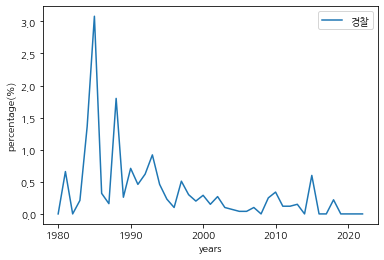

In [ ]:
#경찰, 친구
plt.plot(comedy_word_df.year,comedy_word_df['경찰'],label = '경찰')
#plt.plot(comedy_word_df.year,comedy_word_df['친구'],label = '친구')
plt.xlabel('years')
plt.ylabel('percentage(%)')
plt.legend()
#plt.show()
plt.savefig('comedy_keyword_police.jpeg',dpi=300)

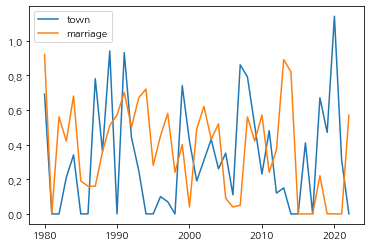

In [ ]:
#마을, 결혼
plt.plot(comedy_word_df.year,comedy_word_df['마을'],label = '마을')
plt.plot(comedy_word_df.year,comedy_word_df['결혼'],label = '결혼')
plt.xlabel('years')
plt.ylabel('percentage(%)')
plt.legend()
plt.show()

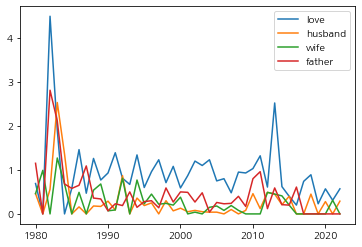

In [ ]:
#사랑, 남편, 아내, 아버지
plt.plot(comedy_word_df.year,comedy_word_df['사랑'],label = '사랑')
plt.plot(comedy_word_df.year,comedy_word_df['남편'],label = '남편')
plt.plot(comedy_word_df.year,comedy_word_df['아내'],label = '아내')
plt.plot(comedy_word_df.year,comedy_word_df['아버지'],label = '아버지')
plt.xlabel('years')
plt.ylabel('percentage(%)')
plt.legend()
plt.show()

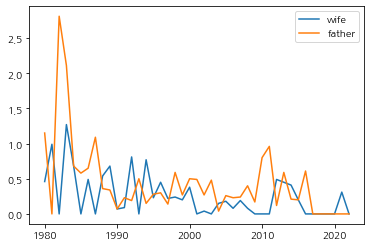

In [ ]:
#아내, 아버지
plt.plot(comedy_word_df.year,comedy_word_df['아내'],label = '아내')
plt.plot(comedy_word_df.year,comedy_word_df['아버지'],label = '아버지')
plt.xlabel('years')
plt.ylabel('percentage(%)')
plt.legend()
plt.show()

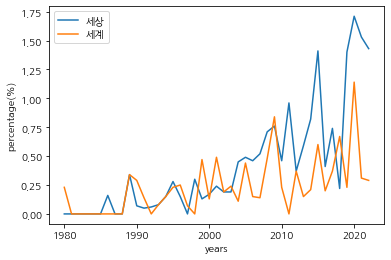

In [20]:
#세상, 세계
plt.plot(comedy_word_df.year,comedy_word_df['세상'],label = '세상')
plt.plot(comedy_word_df.year,comedy_word_df['세계'],label = '세계')
plt.xlabel('years')
plt.ylabel('percentage(%)')
plt.legend()
#plt.show()
plt.savefig('comedy_keyword_globe&world.jpeg',dpi=300)

# 스릴러영화

In [21]:
#스릴러 영화 

DF_thriller=DF[DF.genre.str.contains('스릴러')]
DF_thriller


title  year  audience                 date                 genre  \
43            자백  2022    284527  2022-10-26 00:00:00               범죄, 스릴러   
49            문폴  2022    195346  2022-03-16 00:00:00  액션, 드라마, 스릴러, SF, 모험   
51    오펀: 천사의 탄생  2022    172886  2022-10-12 00:00:00               공포, 스릴러   
52            앵커  2022    171105  2022-04-20 00:00:00                   스릴러   
56     하우스 오브 구찌  2022    143605  2022-01-12 00:00:00          스릴러, 드라마, 범죄   
...          ...   ...       ...                  ...                   ...   
4162    깊은 밤 갑자기  1981     28178  1981-07-17 00:00:00           공포, 범죄, 스릴러   
4190   망령의 웨딩드레스  1981     14377  1981-04-16 00:00:00               공포, 스릴러   
4203         체이사  1980    295554  1980-03-08 00:00:00          범죄, 드라마, 스릴러   
4213        황금탈출  1980    178038  1980-07-31 00:00:00               범죄, 스릴러   
4219        데드 쉽  1980    164786  1980-08-07 00:00:00     모험, 공포, 미스터리, 스릴러   

                                                  actor  country  \
43            소지섭(유민호), 김윤진(이희정), 나나(김세희), 소지섭, 김윤진, 나나     대한민국   
49         할리 베리, 패트릭 윌슨, 존 브래들리, 할리 베리, 패트릭 윌슨, 존 브래들리       미국   
51                   이사벨 퍼만, 줄리아 스타일스, 이사벨 퍼만, 줄리아 스타일스       미국   
52          천우희(정세라), 신하균(최인호), 이혜영(이소정), 천우희, 신하균, 이혜영     대한민국   
56     레이디 가가, 아담 드라이버, 자레드 레토, 레이디 가가, 아담 드라이버, 자레드 레토       미국   
...                                                 ...      ...   
4162           윤일봉(유진), 김영애(선희), 이기선(미옥), 윤일봉, 김영애, 이기선     대한민국   
4190                     정세혁, 서정아, 선우은숙, 정세혁, 서정아, 선우은숙     대한민국   
4203                     알랑 드롱, 오르넬라 무티, 알랑 드롱, 오르넬라 무티      프랑스   
4213                 리처드 해리스, 데이비드 잰슨, 리처드 해리스, 데이비드 잰슨       미국   
4219  조지 케네디(애쉬랜드 선장), 리차드 크레나(트레버 마샬), 닉 맨쿠소(닉), 조지...  캐나다, 영국   

                      director          age  score  \
43                    윤종석, 윤종석      15세 관람가   8.50   
49      롤랜드 에머리히, 롤랜드 에머리히, 신고      12세 관람가   5.07   
51    윌리엄 브렌트 벨, 윌리엄 브렌트 벨, 신고      15세 관람가   6.46   
52                    정지연, 정지연      15세 관람가   7.08   
56          리들리 스콧, 리들리 스콧, 신고      15세 관람가   7.88   
...                        ...          ...    ...   
4162                  고영남, 고영남     청소년 관람불가   8.94   
4190              박윤교, 박윤교, 신고     청소년 관람불가   6.88   
4203        조지 로트너, 조지 로트너, 신고           NR   8.00   
4213                       nan           PG   0.00   
4219            알빈 라코프, 알빈 라코프  청소년 관람불가, R   7.37   

                                               synopsis  
43    ['불륜 사실을 폭로하겠다는 협박을 받고 향한 호텔에서 의문의 습격을 당한 유민호(...  
49    ['궤도를 이탈한 달이 지구를 향해 떨어지기 시작하면서 지구의 중력과 모든 물리적인...  
51    ['엄청난 비밀을 숨긴 사이코패스가 에스토니아의 정신병동을 탈출, 부유한 가족의 실...  
52    ['생방송 5분 전, 방송국 간판 앵커 ‘세라’(천우희)에게자신이 살해될 것이라며 ...  
56    ['처음부터 사랑에 빠졌던 그 이름 구찌내 것이 될수록 더욱 갖고 싶었던 이름누구에...  
...                                                 ...  
4162  ['곤충학자인 강박사(윤일봉)과 그의 아내 선희(김영애)의 집에 어느 날 19살 미...  
4190  ['신달산업 사장 김영하는 1개월전에 죽은 정임과 똑같은 마네킹을 교통사고 나게 한...  
4203                                         ['줄거리 오류']  
4213                                         ['줄거리 오류']  
4219  ['승객을 싣고 대서양을 횡단하던 유람선이 갑자기 나타난 정체모를 괴선과 충돌한다....  

[777 rows x 11 columns]

In [22]:
# 스릴러 영화 시놉시스 태깅(명사)
thriller_synopsis_list = {}
for i in range(2022,1979,-1):
    thriller_synopsis_list[i] = []
    sentences = DF_thriller[DF.year==i]['synopsis'].values.tolist()
    tagged_sentences = [tagger.pos(sent) for sent in sentences]
    for sent in tagged_sentences:   
        for word, tag in sent:
            if tag in ['NNG'] and word not in ['시작', '한편']: #and len(word)>1:
                thriller_synopsis_list[i].append(word)


<ipython-input-22-021a23cdc222>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sentences = DF_thriller[DF.year==i]['synopsis'].values.tolist()


In [ ]:
thriller_synopsis_list[2021]

['앞',
 '등장',
 '앞',
 '세상',
 '예고',
 '시대',
 '악',
 '악',
 '처단',
 '평소',
 '새벽',
 '한복판',
 '증거',
 '톱',
 '납치',
 '앞',
 '상황',
 '속살',
 '성',
 '규',
 '아이',
 '차',
 '출발',
 '출근길',
 '통',
 '발신',
 '번호',
 '표시',
 '제한',
 '전화',
 '전화기',
 '의문',
 '목소리',
 '차',
 '설치',
 '자리',
 '경우',
 '경고',
 '의문',
 '전화',
 '성',
 '규',
 '회사',
 '동료',
 '차',
 '방식',
 '폭파',
 '눈',
 '앞',
 '목격',
 '졸지',
 '경찰',
 '추격',
 '절체절명',
 '순간',
 '경찰',
 '추격',
 '속',
 '의문',
 '발신자',
 '전화',
 '상황',
 '공격',
 '세상',
 '대신',
 '죽음',
 '선택',
 '아빠',
 '이후',
 '가족',
 '위험',
 '노출',
 '갓',
 '막내',
 '포함',
 '소리',
 '사투',
 '엄마',
 '은신처',
 '집',
 '밖',
 '고요',
 '바깥',
 '위험',
 '지역',
 '시골',
 '마을',
 '집',
 '안',
 '숲',
 '산',
 '나무',
 '논밭',
 '곳',
 '사람',
 '혼',
 '가문',
 '조상신',
 '신',
 '상태',
 '직감',
 '이상',
 '증세',
 '취재',
 '동행',
 '촬영',
 '팀',
 '은신',
 '대물림',
 '순간',
 '포착',
 '가족',
 '현상',
 '카메라',
 '신',
 '대물림',
 '가문',
 '피',
 '달',
 '기록',
 '역사',
 '최초',
 '잔혹',
 '살해',
 '주장',
 '초유',
 '사태',
 '사건',
 '배후',
 '빙의',
 '소년',
 '초자연',
 '현상',
 '연구',
 '부부',
 '사건',
 '실화',
 '거짓',
 '범인',
 '인간',
 '악마',
 '기억',
 '옆',
 '엔',
 '남편',
 '집',

In [23]:
# 리스트 틀 만들기
thriller_synopsis_info = {
    "연도": [],
    "1위 키워드": [],
    "2위 키워드": [],
    "3위 키워드": [],
    "4위 키워드": [],
    "5위 키워드": [],
    "6위 키워드": [],
    "7위 키워드": [],
    "8위 키워드": [],
    "9위 키워드": [],
    "10위 키워드": []
}
thriller_si = pd.DataFrame(thriller_synopsis_info)

In [24]:
thriller_si

Empty DataFrame
Columns: [연도, 1위 키워드, 2위 키워드, 3위 키워드, 4위 키워드, 5위 키워드, 6위 키워드, 7위 키워드, 8위 키워드, 9위 키워드, 10위 키워드]
Index: []

In [25]:
for i in range(2022,1979,-1):
    synopsis_data = Counter(thriller_synopsis_list[i]).most_common()
    synopsis_m = sum(Counter(thriller_synopsis_list[i]).values())
    new_data = {
        "연도": str(i),
        "1위 키워드": synopsis_data[0][0] + " (" + '%.2f%%'%(Counter(thriller_synopsis_list[i]).most_common()[0][1]/synopsis_m*100) + ")",
        "2위 키워드": synopsis_data[1][0] + " (" + '%.2f%%'%(Counter(thriller_synopsis_list[i]).most_common()[1][1]/synopsis_m*100) + ")",
        "3위 키워드": synopsis_data[2][0] + " (" + '%.2f%%'%(Counter(thriller_synopsis_list[i]).most_common()[2][1]/synopsis_m*100) + ")",
        "4위 키워드": synopsis_data[3][0] + " (" + '%.2f%%'%(Counter(thriller_synopsis_list[i]).most_common()[3][1]/synopsis_m*100) + ")",
        "5위 키워드": synopsis_data[4][0] + " (" + '%.2f%%'%(Counter(thriller_synopsis_list[i]).most_common()[4][1]/synopsis_m*100) + ")",
        "6위 키워드": synopsis_data[5][0] + " (" + '%.2f%%'%(Counter(thriller_synopsis_list[i]).most_common()[5][1]/synopsis_m*100) + ")",
        "7위 키워드": synopsis_data[6][0] + " (" + '%.2f%%'%(Counter(thriller_synopsis_list[i]).most_common()[6][1]/synopsis_m*100) + ")",
        "8위 키워드": synopsis_data[7][0] + " (" + '%.2f%%'%(Counter(thriller_synopsis_list[i]).most_common()[7][1]/synopsis_m*100) + ")",
        "9위 키워드": synopsis_data[8][0] + " (" + '%.2f%%'%(Counter(thriller_synopsis_list[i]).most_common()[8][1]/synopsis_m*100) + ")",
        "10위 키워드": synopsis_data[9][0] + " (" + '%.2f%%'%(Counter(thriller_synopsis_list[i]).most_common()[9][1]/synopsis_m*100) + ")",}
    thriller_si = thriller_si.append(new_data,ignore_index=True)

thriller_si = thriller_si.set_index("연도")

In [26]:
thriller_si

1위 키워드       2위 키워드       3위 키워드       4위 키워드       5위 키워드  \
연도                                                                     
2022  사건 (3.67%)   사람 (2.04%)   가족 (2.04%)    달 (1.63%)    딸 (1.63%)   
2021  의문 (1.46%)    속 (1.46%)   사람 (1.46%)    차 (1.25%)    귀 (1.25%)   
2020   속 (2.09%)    돈 (1.67%)   가방 (1.67%)   가족 (1.67%)    앞 (1.67%)   
2019   룸 (2.32%)   발견 (1.54%)   경찰 (1.54%)   모두 (1.54%)   세상 (1.54%)   
2018  사건 (2.43%)   선택 (2.08%)    집 (1.74%)  실험실 (1.39%)   계획 (1.39%)   
2017   날 (2.26%)   사고 (2.26%)    딸 (2.26%)   남자 (1.81%)    속 (1.36%)   
2016   속 (1.94%)   사고 (1.30%)   사건 (1.30%)   사람 (1.08%)   의문 (1.08%)   
2015  자신 (2.10%)   사건 (1.80%)   인류 (1.05%)   최악 (1.05%)   사상 (1.05%)   
2014  자신 (2.04%)   능력 (2.04%)    속 (1.70%)   기억 (1.36%)    날 (1.36%)   
2013  자신 (2.44%)    집 (1.92%)   사건 (1.92%)   존재 (1.40%)    형 (1.22%)   
2012  자신 (1.95%)   사건 (1.95%)   위험 (1.30%)   세계 (1.30%)   세상 (0.98%)   
2011  사건 (2.37%)   자신 (1.95%)   시간 (1.67%)   세계 (1.53%)   사람 (1.53%)   
2010  자신 (2.04%)   사건 (1.66%)    딸 (1.36%)    날 (0.97%)   아내 (0.88%)   
2009  사건 (1.86%)    속 (1.32%)   범인 (0.96%)   자신 (0.78%)   인류 (0.78%)   
2008  자신 (1.76%)   사건 (1.14%)   현장 (1.14%)   남자 (1.14%)   목숨 (1.04%)   
2007  자신 (2.12%)   사건 (1.78%)   사람 (1.19%)   발견 (1.10%)   진실 (1.10%)   
2006  사람 (1.69%)   자신 (1.69%)    날 (0.77%)   조직 (0.77%)  아파트 (0.77%)   
2005  사건 (2.08%)   자신 (1.69%)   사람 (0.97%)    속 (0.84%)    딸 (0.78%)   
2004  자신 (1.74%)   사건 (1.36%)   인간 (1.29%)    속 (1.29%)   사람 (0.98%)   
2003  자신 (1.35%)   사건 (1.19%)    속 (1.14%)   사람 (0.94%)   인간 (0.83%)   
2002  자신 (2.31%)    후 (0.92%)    딸 (0.85%)   사실 (0.77%)   죽음 (0.69%)   
2001  자신 (2.05%)   사건 (1.39%)   발견 (0.95%)   세계 (0.88%)   사람 (0.88%)   
2000  자신 (2.22%)   사건 (1.19%)   사람 (0.87%)   살해 (0.87%)   세상 (0.79%)   
1999  자신 (1.37%)   사람 (1.17%)    딸 (1.12%)   아내 (1.06%)   발견 (1.01%)   
1998  자신 (1.94%)   사건 (1.34%)   안보 (1.09%)   국가 (0.97%)   경찰 (0.97%)   
1997   코 (1.41%)   박사 (1.15%)   자신 (1.06%)   아내 (0.97%)   사건 (0.88%)   
1996  자신 (1.77%)    길 (1.52%)   범인 (1.13%)   사건 (0.74%)   사람 (0.71%)   
1995  자신 (1.44%)   세계 (0.92%)   사람 (0.92%)   머니 (0.92%)  컴퓨터 (0.72%)   
1994  사건 (2.59%)   자신 (2.34%)   경찰 (1.25%)   사람 (1.00%)   여자 (0.92%)   
1993  자신 (1.94%)   경찰 (1.48%)   범인 (1.17%)   사건 (1.09%)   살해 (1.01%)   
1992   집 (1.17%)   자신 (1.03%)   사실 (0.96%)   사건 (0.89%)   사람 (0.89%)   
1991  사건 (2.30%)    일 (1.11%)   살해 (1.11%)    뒤 (1.02%)   경찰 (1.02%)   
1990  발견 (1.53%)   경찰 (1.31%)  도살장 (1.31%)   사건 (1.20%)   키즈 (1.10%)   
1989  사건 (1.52%)   경찰 (1.41%)   사람 (1.20%)   발견 (0.98%)    말 (0.98%)   
1988  영화 (2.64%)   경찰 (1.98%)   사실 (1.65%)    집 (1.32%)   모습 (1.32%)   
1987  제시 (3.21%)   조직 (1.55%)   자신 (1.44%)    몸 (1.22%)    일 (1.11%)   
1986   혹 (3.72%)   주민 (2.97%)   구출 (2.23%)   회사 (1.49%)   동행 (1.49%)   
1985  살해 (2.03%)    집 (2.03%)    잠 (2.03%)    꿈 (2.03%)  어머니 (1.78%)   
1984  기계 (2.76%)   인간 (2.30%)   아들 (2.07%)   자신 (1.84%)   사건 (1.61%)   
1983  사감 (3.43%)   아내 (2.86%)   수사 (1.14%)    때 (1.14%)    밤 (1.14%)   
1982   매 (6.08%)    티 (6.08%)   자신 (3.97%)    곤 (1.59%)    돈 (1.59%)   
1981  영하 (6.86%)    병 (3.92%)    금 (3.92%)   사랑 (3.92%)   부인 (2.94%)   
1980   배 (8.57%)  줄거리 (5.71%)   승객 (5.71%)   표류 (5.71%)   발견 (5.71%)   

           6위 키워드      7위 키워드      8위 키워드       9위 키워드      10위 키워드  
연도                                                                   
2022   세계 (1.22%)  엄마 (1.22%)  충격 (1.22%)   발생 (1.22%)   조직 (1.22%)  
2021  수련원 (1.25%)   앞 (1.04%)  경찰 (1.04%)   사건 (1.04%)   자신 (1.04%)  
2020  마지막 (1.67%)  시간 (1.67%)  방법 (1.67%)   세계 (1.26%)    날 (1.26%)  
2019   사건 (1.54%)  존재 (1.54%)  도시 (1.54%)    속 (1.54%)   친구 (1.54%)  
2018   자신 (1.39%)  남편 (1.39%)  발견 (1.04%)    후 (1.04%)   공포 (1.04%)  
2017   발견 (1.13%)  소녀 (1.13%)  인류 (1.13%)   시간 (0.90%)   자신 (0.90%)  
2016   자신 (1.08%)  발견 (1.08%)   곳 (1.08%)   사투 (0.86%)  외지인 (0.86%)  
2015   조직 (0.90%)  과거 (0.90%)   말 (0.90%)   의문 (0.75%)   탈출 (0.75%)  
2014   수트 (1.36%)  비밀 (1.36%)  귀신 (1.36%)   위기 (1.02%)   존재 (1.02%)  

In [27]:
word_count_1_data=[]
word_count_2_data=[]
word_count_3_data=[]
word_count_4_data=[]
word_count_5_data=[]
word_count_6_data=[]
word_count_7_data=[]
word_count_8_data=[]
word_count_9_data=[]
word_count_10_data=[]
year_data=[]
for i in range(2022,1979,-1):
  count_num_1 = thriller_synopsis_list[i].count('세계')
  count_num_2 = thriller_synopsis_list[i].count('세상')
  count_num_3 = thriller_synopsis_list[i].count('의문')
  count_num_4 = thriller_synopsis_list[i].count('아내')
  count_num_5 = thriller_synopsis_list[i].count('조직')
  count_num_6 = thriller_synopsis_list[i].count('딸')
  count_num_7 = thriller_synopsis_list[i].count('발견')
  count_num_8 = thriller_synopsis_list[i].count('살해')
  count_num_9 = thriller_synopsis_list[i].count('범인')
  count_num_10 = thriller_synopsis_list[i].count('돈')
  synopsis_m = sum(Counter(thriller_synopsis_list[i]).values())
  word_count_1_data.append(round(count_num_1/synopsis_m*100,2))
  word_count_2_data.append(round(count_num_2/synopsis_m*100,2))
  word_count_3_data.append(round(count_num_3/synopsis_m*100,2))
  word_count_4_data.append(round(count_num_4/synopsis_m*100,2))
  word_count_5_data.append(round(count_num_5/synopsis_m*100,2))
  word_count_6_data.append(round(count_num_6/synopsis_m*100,2))
  word_count_7_data.append(round(count_num_7/synopsis_m*100,2))
  word_count_8_data.append(round(count_num_8/synopsis_m*100,2))
  word_count_9_data.append(round(count_num_9/synopsis_m*100,2))
  word_count_10_data.append(round(count_num_10/synopsis_m*100,2))
  year_data.append(i)


In [28]:

thriller_word_df_data={'year': year_data, '세계': word_count_1_data, '세상': word_count_2_data, '의문' : word_count_3_data, '아내' : word_count_4_data, '조직' : word_count_5_data, '딸' : word_count_6_data, '발견' :word_count_7_data, '살해' : word_count_8_data, '범인' : word_count_9_data, '돈': word_count_10_data}
thriller_word_df = pd.DataFrame(thriller_word_df_data)

thriller_word_df

year    세계    세상    의문    아내    조직     딸    발견    살해    범인     돈
0   2022  1.22  0.00  0.82  0.00  1.22  1.63  0.41  0.41  0.82  0.00
1   2021  0.00  0.83  1.46  0.00  0.21  0.00  0.42  0.42  0.62  0.00
2   2020  1.26  0.00  0.42  0.00  0.00  0.42  0.42  0.42  0.42  1.67
3   2019  0.00  1.54  0.39  0.00  0.00  1.16  1.54  0.00  0.00  0.00
4   2018  0.35  0.00  0.35  0.35  0.35  0.69  1.04  0.35  0.35  0.00
5   2017  0.90  0.23  0.23  0.45  0.23  2.26  1.13  0.23  0.45  0.00
6   2016  0.43  0.22  1.08  0.00  0.00  0.43  1.08  0.43  0.65  0.43
7   2015  0.60  0.75  0.75  0.60  0.90  0.30  0.45  0.75  0.60  0.00
8   2014  0.00  1.02  0.68  1.02  0.00  0.68  0.68  0.34  0.68  0.00
9   2013  0.87  0.17  0.17  0.00  0.17  0.35  0.17  0.17  0.87  0.00
10  2012  1.30  0.98  0.00  0.98  0.33  0.65  0.49  0.16  0.81  0.16
11  2011  1.53  0.14  0.84  0.14  0.14  0.14  0.28  0.00  0.28  0.42
12  2010  0.29  0.19  0.19  0.88  0.10  1.36  0.29  0.88  0.58  0.49
13  2009  0.42  0.30  0.30  0.54  0.42  0.18  0.72  0.72  0.96  0.42
14  2008  0.31  0.31  0.21  0.52  0.83  1.04  0.62  0.00  0.41  0.31
15  2007  0.93  0.51  0.34  0.17  0.17  0.34  1.10  0.17  0.42  0.08
16  2006  0.70  0.49  0.21  0.14  0.77  0.21  0.42  0.14  0.07  0.49
17  2005  0.39  0.19  0.39  0.13  0.71  0.78  0.65  0.13  0.52  0.13
18  2004  0.30  0.30  0.08  0.23  0.30  0.68  0.53  0.38  0.00  0.15
19  2003  0.21  0.26  0.42  0.26  0.26  0.26  0.78  0.42  0.42  0.00
20  2002  0.08  0.31  0.23  0.31  0.39  0.85  0.46  0.15  0.31  0.31
21  2001  0.88  0.15  0.00  0.29  0.15  0.29  0.95  0.29  0.22  0.66
22  2000  0.32  0.79  0.08  0.32  0.08  0.40  0.55  0.87  0.32  0.32
23  1999  0.05  0.00  0.15  1.06  0.35  1.12  1.01  0.71  0.20  0.51
24  1998  0.12  0.18  0.43  0.24  0.12  0.12  0.61  0.43  0.00  0.00
25  1997  0.44  0.09  0.27  0.97  0.44  0.18  0.44  0.44  0.53  0.71
26  1996  0.18  0.14  0.04  0.57  0.46  0.46  0.53  0.25  1.13  0.28
27  1995  0.92  0.00  0.26  0.26  0.46  0.51  0.21  0.26  0.41  0.26
28  1994  0.17  0.00  0.00  0.84  0.67  0.25  0.25  0.84  0.84  0.75
29  1993  0.08  0.00  0.08  0.86  0.00  0.00  0.70  1.01  1.17  0.08
30  1992  0.27  0.00  0.00  0.21  0.27  0.21  0.62  0.41  0.07  0.55
31  1991  0.09  0.00  0.00  0.34  0.09  0.34  0.60  1.11  0.26  0.26
32  1990  0.33  0.00  0.00  0.00  0.11  0.00  1.53  0.88  1.10  0.00
33  1989  0.11  0.33  0.11  0.00  0.54  0.00  0.98  0.44  0.54  0.33
34  1988  0.50  0.00  0.17  0.83  0.00  0.00  0.50  0.83  0.17  0.83
35  1987  0.22  0.00  0.11  0.33  1.55  0.66  1.00  0.88  0.22  0.00
36  1986  0.00  0.00  0.00  0.00  0.00  0.00  0.74  0.00  0.37  0.37
37  1985  0.25  0.00  0.00  0.51  1.27  0.25  0.25  2.03  0.00  0.00
38  1984  0.00  0.00  0.00  0.00  0.46  0.23  0.23  0.46  1.38  0.00
39  1983  0.00  0.57  0.00  2.86  0.00  0.00  0.57  1.14  0.00  0.00
40  1982  0.26  0.00  0.00  0.26  0.00  0.53  0.79  0.53  0.00  1.59
41  1981  0.00  0.00  0.00  0.98  0.00  0.00  0.00  0.00  0.00  0.00
42  1980  0.00  0.00  0.00  0.00  0.00  0.00  5.71  0.00  0.00  0.00

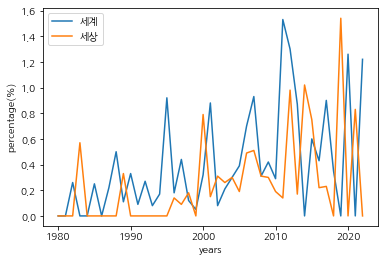

In [30]:
#세계, 세상
plt.plot(thriller_word_df.year,thriller_word_df['세계'],label = '세계')
plt.plot(thriller_word_df.year,thriller_word_df['세상'],label = '세상')
plt.xlabel('years')
plt.ylabel('percentage(%)')
plt.legend()
#plt.show()
plt.savefig('thriller_keyword_globe&world.jpeg',dpi=300)

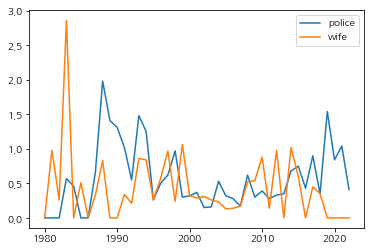

In [ ]:
#경찰, 아내
plt.plot(thriller_word_df.year,thriller_word_df['의문'],label = '의문')
plt.plot(thriller_word_df.year,thriller_word_df['아내'],label = '아내')
plt.xlabel('years')
plt.ylabel('percentage(%)')
plt.legend()
plt.show()

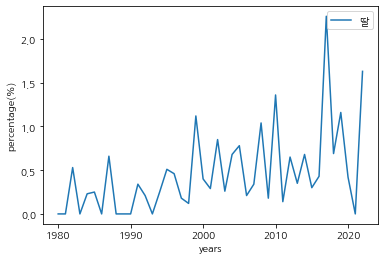

In [ ]:
#조직, 딸
#plt.plot(thriller_word_df.year,thriller_word_df['조직'],label = '조직')
plt.plot(thriller_word_df.year,thriller_word_df['딸'],label = '딸')
plt.xlabel('years')
plt.ylabel('percentage(%)')
plt.legend()
#plt.show()
plt.savefig('thriller_keyword_daughter.jpeg',dpi=300)

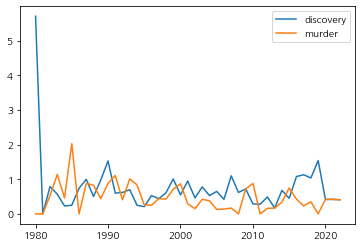

In [ ]:
#발견, 살해
plt.plot(thriller_word_df.year,thriller_word_df['발견'],label = '발견')
plt.plot(thriller_word_df.year,thriller_word_df['살해'],label = '돈')
plt.xlabel('years')
plt.ylabel('percentage(%)')
plt.legend()
plt.show()

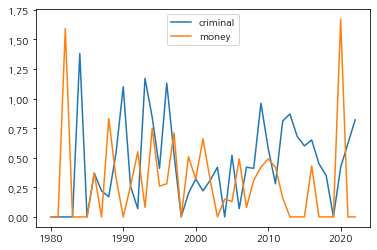

In [ ]:
#범인, 돈
plt.plot(thriller_word_df.year,thriller_word_df['범인'],label = '범인')
plt.plot(thriller_word_df.year,thriller_word_df['돈'],label = '돈')
plt.xlabel('years')
plt.ylabel('percentage(%)')
plt.legend()
plt.show()

# 모험영화

In [31]:
#모험

DF_adventure=DF[DF.genre.str.contains('모험')]
DF_adventure

title  year  audience                 date  \
4     닥터 스트레인지: 대혼돈의 멀티버스  2022   5884600  2022-05-04 00:00:00   
6            쥬라기 월드: 도미니언  2022   2836791  2022-06-01 00:00:00   
8             토르: 러브 앤 썬더  2022   2715683  2022-07-06 00:00:00   
9                   미니언즈2  2022   2268518  2022-07-20 00:00:00   
11          스파이더맨: 노 웨이 홈  2021   1991050  2021-12-15 00:00:00   
...                   ...   ...       ...                  ...   
4219                 데드 쉽  1980    164786  1980-08-07 00:00:00   
4229         삼총사 타임머신 001  1980     97700  1980-01-12 00:00:00   
4245          15소년 우주 표류기  1980     68177  1980-07-27 00:00:00   
4247                  삼국지  1980     63377  1980-01-16 00:00:00   
4252              독수리 5형제  1980     55968  1980-07-26 00:00:00   

                   genre                                              actor  \
4            액션, 판타지, 모험  베네딕트 컴버배치(닥터 스트레인지), 엘리자베스 올슨(완다 막시모프 / 스칼렛 위치...   
6                 액션, 모험  크리스 프랫(오웬 그래디), 브라이스 달라스 하워드(클레어 디어링), 크리스 프랫,...   
8            액션, 모험, 판타지  크리스 헴스워스(토르), 나탈리 포트만(제인 포스터), 테사 톰슨(발키리), 크리스...   
9         애니메이션, 모험, 코미디  스티브 카렐(그루 목소리), 타라지 P. 헨슨(벨 바텀 목소리), 양자경, 스티브 ...   
11            액션, 모험, SF  톰 홀랜드(피터 파커/스파이더맨), 젠데이아 콜먼(MJ), 베네딕트 컴버배치(닥터 ...   
...                  ...                                                ...   
4219   모험, 공포, 미스터리, 스릴러  조지 케네디(애쉬랜드 선장), 리차드 크레나(트레버 마샬), 닉 맨쿠소(닉), 조지...   
4229   애니메이션, 가족, 모험, SF                                                nan   
4245       애니메이션, SF, 모험                                                nan   
4247   애니메이션, 가족, 모험, 전쟁                                                nan   
4252  가족, 모험, 판타지, 애니메이션                                                nan   

      country            director          age  score  \
4          미국        샘 레이미, 샘 레이미      12세 관람가   7.22   
6          미국  콜린 트레보로우, 콜린 트레보로우      12세 관람가   6.14   
8          미국  타이카 와이티티, 타이카 와이티티      12세 관람가   6.38   
9          미국        카일 발다, 카일 발다       전체 관람가   7.68   
11         미국          존 왓츠, 존 왓츠      12세 관람가   8.77   
...       ...                 ...          ...    ...   
4219  캐나다, 영국      알빈 라코프, 알빈 라코프  청소년 관람불가, R   7.37   
4229     대한민국  임정규, 강한영, 임정규, 강한영       전체 관람가    NaN   
4245     대한민국        정수용, 정수용, 신고          nan   7.75   
4247     대한민국        김청기, 김청기, 신고          nan   8.75   
4252     대한민국        이규홍, 이규홍, 신고          nan   7.67   

                                               synopsis  
4     ['끝없이 균열되는 차원과 뒤엉킨 시공간의 멀티버스가 열리며오랜 동료들, 그리고 차...  
6     ['공룡들의 터전이었던 이슬라 누블라 섬이 파괴된 후,마침내 공룡들은 섬을 벗어나 ...  
8     ['슈퍼 히어로 시절이여, 안녕!이너피스를 위해 자아 찾기 여정을 떠난 천둥의 신 ...  
9     ['세계 최고의 슈퍼 악당을 꿈꾸는 미니보스 ‘그루’와 그를 따라다니는 미니언들.어...  
11    ['‘미스테리오’의 계략으로 세상에 정체가 탄로난 스파이더맨 ‘피터 파커’는 하루 ...  
...                                                 ...  
4219  ['승객을 싣고 대서양을 횡단하던 유람선이 갑자기 나타난 정체모를 괴선과 충돌한다....  
4229                                               ['']  
4245  ['우주선을 견학하기 위해 전세계의 소년, 소녀들이우주선에 탑승하지만 철이의 실수로...  
4247  ['몰락한 한왕조의 후예인 유비는 누상촌에서 돗자리를 만들며 생활하고 있다가 황건적...  
4252                                         ['줄거리 오류']  

[625 rows x 11 columns]

In [32]:
#모험영화 시놉시스 태깅(명사)
adventure_synopsis_list = {}
for i in range(2022,1979,-1):
    adventure_synopsis_list[i] = []
    sentences = DF_adventure[DF.year==i]['synopsis'].values.tolist()
    tagged_sentences = [tagger.pos(sent) for sent in sentences]
    for sent in tagged_sentences:   
        for word, tag in sent:
            if tag in ['NNG'] and word not in ['한편', '시작']: #and len(word)>1:
                adventure_synopsis_list[i].append(word)

<ipython-input-32-f77756afe020>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sentences = DF_adventure[DF.year==i]['synopsis'].values.tolist()


In [33]:
# 리스트 틀 만들기
adventure_synopsis_info = {
    "연도": [],
    "1위 키워드": [],
    "2위 키워드": [],
    "3위 키워드": [],
    "4위 키워드": [],
    "5위 키워드": [],
    "6위 키워드": [],
    "7위 키워드": [],
    "8위 키워드": [],
    "9위 키워드": [],
    "10위 키워드": []
}
adventure_si = pd.DataFrame(adventure_synopsis_info)

In [34]:
for i in range(2022,1979,-1):
    synopsis_data = Counter(adventure_synopsis_list[i]).most_common()
    synopsis_m = sum(Counter(adventure_synopsis_list[i]).values())
    new_data = {
        "연도": str(i),
        "1위 키워드": synopsis_data[0][0] + " (" + '%.2f%%'%(Counter(adventure_synopsis_list[i]).most_common()[0][1]/synopsis_m*100) + ")",
        "2위 키워드": synopsis_data[1][0] + " (" + '%.2f%%'%(Counter(adventure_synopsis_list[i]).most_common()[1][1]/synopsis_m*100) + ")",
        "3위 키워드": synopsis_data[2][0] + " (" + '%.2f%%'%(Counter(adventure_synopsis_list[i]).most_common()[2][1]/synopsis_m*100) + ")",
        "4위 키워드": synopsis_data[3][0] + " (" + '%.2f%%'%(Counter(adventure_synopsis_list[i]).most_common()[3][1]/synopsis_m*100) + ")",
        "5위 키워드": synopsis_data[4][0] + " (" + '%.2f%%'%(Counter(adventure_synopsis_list[i]).most_common()[4][1]/synopsis_m*100) + ")",
        "6위 키워드": synopsis_data[5][0] + " (" + '%.2f%%'%(Counter(adventure_synopsis_list[i]).most_common()[5][1]/synopsis_m*100) + ")",
        "7위 키워드": synopsis_data[6][0] + " (" + '%.2f%%'%(Counter(adventure_synopsis_list[i]).most_common()[6][1]/synopsis_m*100) + ")",
        "8위 키워드": synopsis_data[7][0] + " (" + '%.2f%%'%(Counter(adventure_synopsis_list[i]).most_common()[7][1]/synopsis_m*100) + ")",
        "9위 키워드": synopsis_data[8][0] + " (" + '%.2f%%'%(Counter(adventure_synopsis_list[i]).most_common()[8][1]/synopsis_m*100) + ")",
        "10위 키워드": synopsis_data[9][0] + " (" + '%.2f%%'%(Counter(adventure_synopsis_list[i]).most_common()[9][1]/synopsis_m*100) + ")",}
    adventure_si = adventure_si.append(new_data,ignore_index=True)

adventure_si = adventure_si.set_index("연도")

In [35]:
adventure_si

1위 키워드       2위 키워드       3위 키워드      4위 키워드       5위 키워드  \
연도                                                                     
2022    힘 (1.48%)    속 (1.27%)    선 (1.27%)  위협 (1.06%)   인류 (1.06%)   
2021   세상 (3.23%)   인간 (1.49%)    힘 (1.24%)  운명 (1.24%)   모험 (1.24%)   
2020   세상 (2.48%)   위기 (2.07%)    팀 (1.65%)  아빠 (1.65%)   가족 (1.65%)   
2019   자신 (2.70%)   친구 (2.70%)    힘 (2.45%)  세상 (2.21%)   과거 (1.96%)   
2018   사람 (2.20%)   사건 (1.80%)    속 (1.60%)  지구 (1.40%)   전쟁 (1.20%)   
2017   세상 (2.14%)   자신 (1.68%)    힘 (1.22%)  운명 (1.22%)   인간 (1.07%)   
2016   세상 (1.99%)   인간 (1.44%)  아버지 (1.26%)  데스 (1.08%)   전쟁 (1.08%)   
2015   세계 (1.90%)   지구 (1.48%)   인류 (1.48%)  인간 (1.48%)   자신 (1.27%)   
2014   친구 (1.76%)   자신 (1.60%)    날 (1.28%)  소리 (1.12%)   세상 (1.12%)   
2013   세계 (1.90%)   공격 (1.65%)   저택 (1.65%)  지구 (1.39%)   자신 (1.27%)   
2012   세계 (2.20%)    속 (1.65%)   비밀 (1.28%)  자신 (1.28%)    족 (1.28%)   
2011   인간 (2.37%)   전쟁 (1.58%)   세계 (1.45%)  세상 (1.32%)    앞 (1.05%)   
2010   마음 (2.00%)    속 (1.88%)   자신 (1.50%)  세상 (1.25%)    위 (1.25%)   
2009    속 (1.76%)   세상 (1.49%)   자신 (1.32%)  인류 (1.23%)   세계 (1.23%)   
2008    속 (1.52%)   세계 (1.34%)   세상 (1.16%)  지구 (1.16%)   자신 (1.16%)   
2007   세계 (1.89%)   자신 (1.29%)   전쟁 (1.09%)   힘 (1.09%)   인류 (1.09%)   
2006   자신 (1.97%)    속 (1.28%)   사람 (1.16%)  사랑 (1.05%)   바다 (1.05%)   
2005   자신 (1.35%)   세계 (0.92%)   사람 (0.86%)   섬 (0.80%)    속 (0.80%)   
2004    키 (2.56%)    곰 (2.09%)   자신 (1.80%)  인간 (1.23%)   나이 (1.14%)   
2003   인간 (1.54%)   자신 (1.45%)    일 (1.16%)  세계 (1.06%)   전쟁 (0.96%)   
2002   자신 (2.67%)   학교 (1.38%)   인간 (1.18%)   론 (1.18%)   사랑 (0.89%)   
2001   자신 (2.27%)   인간 (1.94%)   세계 (1.52%)   날 (0.93%)   벽장 (0.84%)   
2000   자신 (1.48%)  목소리 (1.30%)   대피 (1.30%)   섬 (1.11%)    메 (1.11%)   
1999  목소리 (2.03%)   박사 (2.03%)   자신 (1.69%)  친구 (1.19%)   발견 (1.19%)   
1998  목소리 (2.81%)   개미 (2.31%)   자신 (1.57%)   속 (1.40%)    얼 (1.16%)   
1997  할머니 (1.36%)    후 (1.19%)   자신 (1.19%)   섬 (1.19%)   황실 (1.02%)   
1996   자신 (1.76%)   아이 (1.76%)    안 (1.32%)  사람 (1.32%)  생존자 (1.32%)   
1995   자신 (1.38%)    란 (1.38%)    셀 (1.38%)   기 (1.38%)    비 (1.38%)   
1994    왕 (2.59%)   무기 (2.45%)   제시 (1.77%)   금 (1.36%)   이때 (1.23%)   
1993    속 (1.82%)    얼 (1.82%)   영화 (1.59%)  범인 (1.37%)   생존 (1.14%)   
1992   자신 (1.66%)   카드 (1.32%)    돈 (1.32%)   빈 (1.32%)   아들 (1.32%)   
1991   자신 (1.93%)    에 (1.54%)    끝 (1.54%)   언 (1.54%)   사람 (1.54%)   
1990  조종사 (1.28%)    속 (1.28%)   천방 (1.28%)  조종 (0.96%)   리틀 (0.96%)   
1989   귀신 (2.86%)   스님 (2.45%)   마을 (2.04%)  사람 (2.04%)   보검 (1.63%)   
1988   발견 (6.25%)   정보 (6.25%)   시골 (3.12%)  전학 (3.12%)   콕스 (3.12%)   
1987   사람 (1.78%)  아버지 (1.58%)   호텔 (1.38%)  구출 (1.18%)    루 (1.18%)   
1986    로 (3.85%)    나 (2.45%)    판 (2.10%)   성 (1.75%)   신부 (1.40%)   
1985   사람 (3.19%)   도시 (3.19%)    티 (3.19%)   속 (2.13%)   지구 (2.13%)   
1984  외계인 (3.26%)   자신 (3.26%)   그때 (2.72%)   속 (2.17%)    집 (2.17%)   
1983    사 (3.08%)   마을 (2.56%)   도움 (2.05%)   칼 (1.54%)    루 (1.54%)   
1982    인 (3.08%)   박사 (2.56%)   보관 (1.54%)  성궤 (1.54%)   위치 (1.54%)   
1981    힘 (2.63%)   기사 (2.63%)   사실 (2.63%)  사랑 (2.63%)   일당 (1.97%)   
1980   사람 (3.64%)   마을 (2.73%)   기사 (2.73%)  표류 (2.73%)    배 (2.73%)   

           6위 키워드       7위 키워드       8위 키워드       9위 키워드      10위 키워드  
연도                                                                     
2022   우주 (1.06%)   전쟁 (1.06%)   바다 (1.06%)   세계 (1.06%)   친구 (1.06%)  
2021   비밀 (1.24%)    속 (1.24%)   세계 (1.24%)    숲 (1.24%)   이상 (1.00%)  
2020   위협 (1.24%)   세계 (1.24%)    새 (1.24%)   모험 (1.24%)   위험 (1.24%)  
2019    속 (1.96%)   도시 (1.72%)    날 (1.47%)   평화 (1.47%)   위험 (1.47%)  
2018   발견 (1.20%)   자신 (1.20%)   이름 (1.20%)    날 (1.20%)   세계 (1.00%)  
2017   사건 (1.07%)   친구 (1.07%)   위협 (0.92%)   비밀 (0.92%)    날 (0.92%)  
2016    곳 (1.08%)    전 (0.90%)   비밀 (0.90%)    눈 (0.90%)   존재 (0.90%)  
2015   가족 (1.27%)   최고 (1.05%)    날 (1.05%)   정의 (0.84%)   우주 (0.84%)  
2014    왕 (1.12%)   위험 (1.12%)    속 (1.12%)   세계 (

In [36]:
word_count_1_data=[]
word_count_2_data=[]
word_count_3_data=[]
word_count_4_data=[]
word_count_5_data=[]
word_count_6_data=[]
word_count_7_data=[]
word_count_8_data=[]
word_count_9_data=[]
word_count_10_data=[]
year_data=[]
for i in range(2022,1979,-1):
  count_num_1 = adventure_synopsis_list[i].count('세계')
  count_num_2 = adventure_synopsis_list[i].count('기사')
  count_num_3 = adventure_synopsis_list[i].count('우주')
  count_num_4 = adventure_synopsis_list[i].count('전쟁')
  count_num_5 = adventure_synopsis_list[i].count('위협')
  count_num_6 = adventure_synopsis_list[i].count('아버지')
  count_num_7 = adventure_synopsis_list[i].count('인간')
  count_num_8 = adventure_synopsis_list[i].count('친구')
  count_num_9 = adventure_synopsis_list[i].count('가족')
  count_num_10 = adventure_synopsis_list[i].count('세상')
  synopsis_m = sum(Counter(adventure_synopsis_list[i]).values())
  word_count_1_data.append(round(count_num_1/synopsis_m*100,2))
  word_count_2_data.append(round(count_num_2/synopsis_m*100,2))
  word_count_3_data.append(round(count_num_3/synopsis_m*100,2))
  word_count_4_data.append(round(count_num_4/synopsis_m*100,2))
  word_count_5_data.append(round(count_num_5/synopsis_m*100,2))
  word_count_6_data.append(round(count_num_6/synopsis_m*100,2))
  word_count_7_data.append(round(count_num_7/synopsis_m*100,2))
  word_count_8_data.append(round(count_num_8/synopsis_m*100,2))
  word_count_9_data.append(round(count_num_9/synopsis_m*100,2))
  word_count_10_data.append(round(count_num_10/synopsis_m*100,2))
  year_data.append(i)

In [37]:
adventure_word_df_data={'year': year_data, '세계': word_count_1_data, '기사': word_count_2_data, '우주' : word_count_3_data, '전쟁' : word_count_4_data, '위협' : word_count_5_data, '아버지' : word_count_6_data, '인간' :word_count_7_data, '친구' : word_count_8_data, '가족' : word_count_9_data, '세상': word_count_10_data}
adventure_word_df = pd.DataFrame(adventure_word_df_data)

adventure_word_df

year    세계    기사    우주    전쟁    위협   아버지    인간    친구    가족    세상
0   2022  1.06  0.21  1.06  1.06  1.06  0.00  0.64  1.06  0.00  0.85
1   2021  1.24  0.00  0.50  0.25  0.50  0.50  1.49  1.00  0.75  3.23
2   2020  1.24  0.00  0.41  0.41  1.24  0.41  0.83  1.24  1.65  2.48
3   2019  0.74  0.00  0.25  0.25  1.23  0.25  0.00  2.70  1.23  2.21
4   2018  1.00  0.00  0.20  1.20  0.20  0.40  0.80  0.80  0.60  0.80
5   2017  0.76  0.00  0.31  0.76  0.92  0.15  1.07  1.07  0.46  2.14
6   2016  0.90  0.00  0.36  1.08  0.72  1.26  1.44  0.54  0.72  1.99
7   2015  1.90  0.00  0.84  0.42  0.63  0.21  1.48  0.63  1.27  0.84
8   2014  1.12  0.00  0.32  0.80  0.80  0.16  0.80  1.76  1.12  1.12
9   2013  1.90  0.00  0.63  0.76  0.76  0.38  1.14  0.63  0.89  1.14
10  2012  2.20  0.00  0.00  0.55  0.37  0.37  0.18  0.73  0.55  0.92
11  2011  1.45  0.40  0.13  1.58  0.40  0.40  2.37  0.66  0.26  1.32
12  2010  0.50  0.00  0.12  0.62  0.38  0.62  0.88  1.00  0.00  1.25
13  2009  1.23  0.00  0.26  0.53  0.70  0.44  1.05  0.88  0.35  1.49
14  2008  1.34  0.00  0.71  0.63  0.45  0.09  1.07  0.27  0.36  1.16
15  2007  1.89  0.00  0.50  1.09  0.10  0.10  0.70  0.20  0.40  0.40
16  2006  0.70  0.00  0.00  0.23  0.23  0.58  0.35  0.35  0.35  0.46
17  2005  0.92  0.12  0.18  0.12  0.12  0.18  0.55  0.74  0.31  0.18
18  2004  0.66  0.09  0.09  0.28  0.28  0.38  1.23  0.19  0.00  0.19
19  2003  1.06  0.00  0.19  0.96  0.29  0.77  1.54  0.58  0.19  0.29
20  2002  0.30  0.39  0.00  0.79  0.30  0.49  1.18  0.69  0.59  0.59
21  2001  1.52  0.67  0.42  0.34  0.00  0.59  1.94  0.25  0.08  0.42
22  2000  0.19  0.00  0.19  0.00  0.00  0.19  0.00  0.19  0.00  0.00
23  1999  1.02  0.00  0.00  0.17  0.17  0.51  1.02  1.19  0.34  0.51
24  1998  0.17  0.33  0.41  0.17  0.33  0.50  0.00  0.25  0.17  0.00
25  1997  0.17  0.17  0.85  0.00  0.17  0.17  0.51  0.51  0.85  0.00
26  1996  0.11  0.22  0.66  0.00  0.11  0.22  0.33  0.55  0.00  0.22
27  1995  0.31  0.61  0.00  0.61  0.15  0.46  0.77  0.15  0.00  0.00
28  1994  0.14  0.00  0.00  0.00  0.27  0.14  0.00  0.41  0.00  0.14
29  1993  0.46  0.00  0.00  0.00  0.00  0.46  0.91  0.68  0.23  0.91
30  1992  0.33  0.00  0.00  0.33  0.33  0.66  0.00  0.33  0.99  0.33
31  1991  0.39  0.00  0.00  0.39  0.19  0.39  0.39  0.19  0.77  0.00
32  1990  0.96  0.00  0.00  0.64  0.00  0.00  0.96  0.32  0.00  0.32
33  1989  0.41  0.00  0.00  0.00  0.00  1.22  0.41  0.41  0.00  0.00
34  1988  0.00  0.00  0.00  0.00  0.00  0.00  0.00  3.12  0.00  0.00
35  1987  0.59  0.20  1.18  0.00  0.00  1.58  0.20  0.79  0.00  0.00
36  1986  0.00  0.35  0.00  0.00  0.00  0.70  0.00  0.35  0.00  0.00
37  1985  1.06  0.00  0.00  0.53  0.00  0.53  0.00  0.00  0.00  0.00
38  1984  0.00  0.00  0.00  0.00  0.00  0.00  1.09  0.54  0.00  0.00
39  1983  0.00  0.00  0.00  0.00  0.00  0.51  0.00  0.00  0.00  0.51
40  1982  0.51  0.51  0.00  0.00  0.00  0.00  0.00  0.51  0.00  0.00
41  1981  0.00  2.63  0.66  0.00  0.66  0.66  0.66  0.00  0.00  0.00
42  1980  0.00  2.73  1.82  0.00  0.00  0.00  0.00  0.00  0.00  0.00

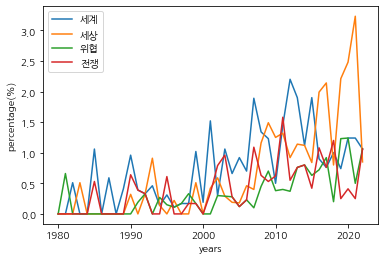

In [40]:
#세계, 세상, 위협, 전쟁 상승
plt.plot(adventure_word_df.year,adventure_word_df['세계'],label = '세계')
plt.plot(adventure_word_df.year,adventure_word_df['세상'],label = '세상')
plt.plot(adventure_word_df.year,adventure_word_df['위협'],label = '위협')
plt.plot(adventure_word_df.year,adventure_word_df['전쟁'],label = '전쟁')
plt.xlabel('years')
plt.ylabel('percentage(%)')
plt.legend()
#plt.show()
plt.savefig('adventure_keyword_world&globe&threat&war.jpeg',dpi=300)


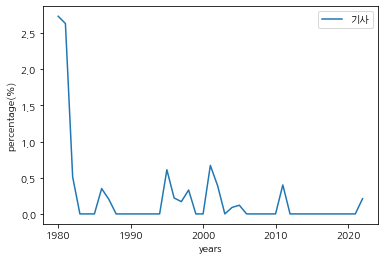

In [ ]:
#세계, 기사
plt.plot(adventure_word_df.year,adventure_word_df['세계'],label = '세계')
#plt.plot(adventure_word_df.year,adventure_word_df['기사'],label = '기사')
plt.xlabel('years')
plt.ylabel('percentage(%)')
plt.legend()
#plt.show()
plt.savefig('adventrue_keyword_world.jpeg',dpi=300)

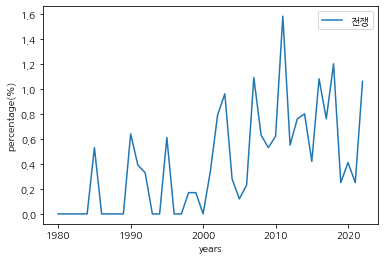

In [ ]:
#우주, 전쟁
#plt.plot(adventure_word_df.year,adventure_word_df['우주'],label = '우주')
plt.plot(adventure_word_df.year,adventure_word_df['전쟁'],label = '전쟁')
plt.xlabel('years')
plt.ylabel('percentage(%)')
plt.legend()
plt.savefig('adventure_keyword_war.jpeg',dpi=300)

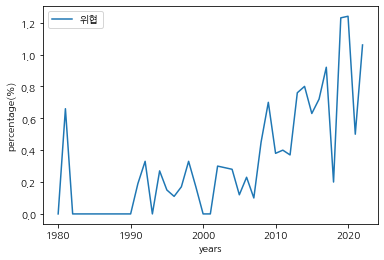

In [38]:
#위협, 아버지
plt.plot(adventure_word_df.year,adventure_word_df['위협'],label = '위협')
#plt.plot(adventure_word_df.year,adventure_word_df['아버지'],label = '아버지')
plt.xlabel('years')
plt.ylabel('percentage(%)')
plt.legend()
plt.show()
#plt.savefig('adventure_keyword_threat.jpeg',dpi=300)

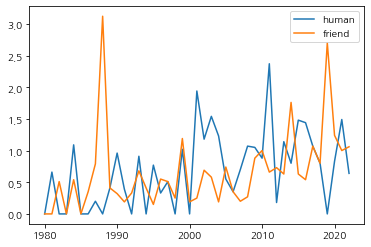

In [ ]:
#인간, 친구
plt.plot(adventure_word_df.year,adventure_word_df['인간'],label = '인간')
plt.plot(adventure_word_df.year,adventure_word_df['친구'],label = '친구')
plt.xlabel('years')
plt.ylabel('percentage(%)')
plt.legend()
plt.show()

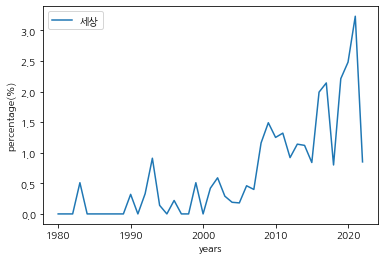

In [ ]:
#가족, 세상
#plt.plot(adventure_word_df.year,adventure_word_df['가족'],label = '가족')
plt.plot(adventure_word_df.year,adventure_word_df['세상'],label = '세상')
plt.xlabel('years')
plt.ylabel('percentage(%)')
plt.legend()
#plt.show()
plt.savefig('adventure_keyword_globe.jpeg',dpi=300)